# Task 2: Customer Segmentation (K-Means Clustering)

### step 1: Import Libraries

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

### Step 2: Load Dataset

In [7]:
df = pd.read_csv(r'D:\eleevo internship\task2\Mall_Customers.csv')
df.head()




,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


### Step 3: Explore the Dataset

In [11]:
print('summary of dataset:\n')
df.describe()

summary of dataset:



,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [14]:
print("Shape:", df.shape)

Shape: (200, 5)


In [16]:
print('Info', df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
Info None


In [17]:
print('Missing values\n')
print(df.isnull().sum())

Missing values

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


### Step 4: Data Cleaning & Feature Selection

In [22]:
# Select only Annual Income and Spending Score because they’re the most useful for finding customer groups.

X = df[['Annual Income (k$)','Spending Score (1-100)']]

print('Selected features shape:', X.shape)
print(X.head())

Selected features shape: (200, 2)
   Annual Income (k$)  Spending Score (1-100)
0                  15                      39
1                  15                      81
2                  16                       6
3                  16                      77
4                  17                      40


### Step 5: Feature Scaling

In [23]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print("First 5 scaled values:")
print(X_scaled[:5])


First 5 scaled values:
[[-1.73899919 -0.43480148]
 [-1.73899919  1.19570407]
 [-1.70082976 -1.71591298]
 [-1.70082976  1.04041783]
 [-1.66266033 -0.39597992]]


### Step 6: Find Optimal Clusters (Elbow Method)

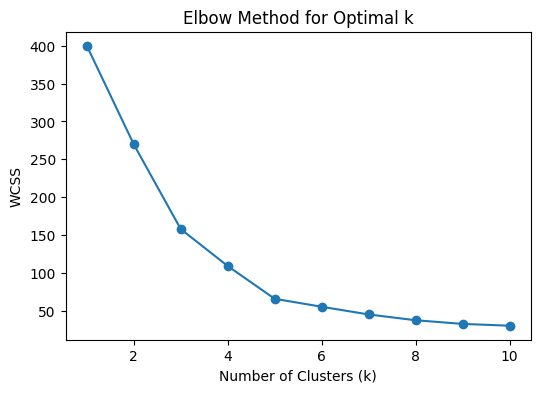

In [24]:
wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

# Plot Elbow Graph
plt.figure(figsize=(6,4))
plt.plot(range(1, 11), wcss, marker='o')
plt.xlabel("Number of Clusters (k)")
plt.ylabel("WCSS")
plt.title("Elbow Method for Optimal k")
plt.show()


### Step 7: Apply K-Means Clustering

In [25]:
# Train KMeans with 5 clusters
kmeans = KMeans(n_clusters=5, random_state=42, n_init=10)
y_kmeans = kmeans.fit_predict(X_scaled)

# Add cluster labels to dataframe
df['Cluster'] = y_kmeans

print("Cluster labels assigned (first 10):")
print(df[['Annual Income (k$)', 'Spending Score (1-100)', 'Cluster']].head(10))


Cluster labels assigned (first 10):
   Annual Income (k$)  Spending Score (1-100)  Cluster
0                  15                      39        4
1                  15                      81        2
2                  16                       6        4
3                  16                      77        2
4                  17                      40        4
5                  17                      76        2
6                  18                       6        4
7                  18                      94        2
8                  19                       3        4
9                  19                      72        2


### Step 8: Visualize Clusters

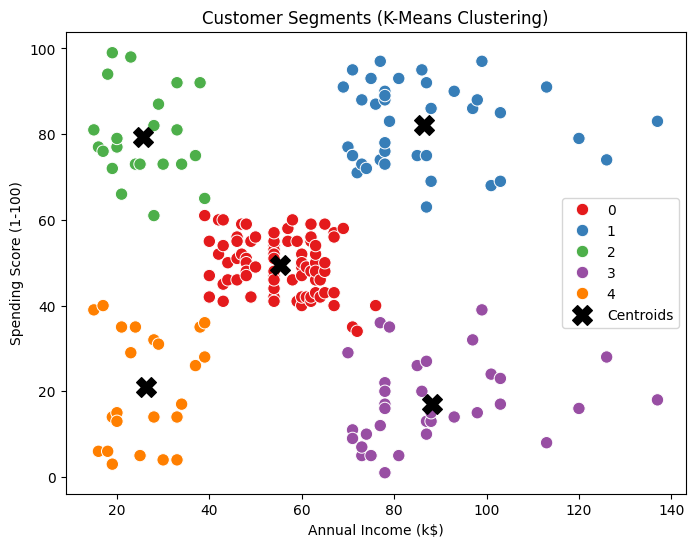

In [26]:
plt.figure(figsize=(8,6))

# Scatter plot with different colors for each cluster
sns.scatterplot(
    x='Annual Income (k$)', 
    y='Spending Score (1-100)', 
    hue='Cluster', 
    palette='Set1', 
    data=df, 
    s=80
)

# Plot cluster centers
centers = scaler.inverse_transform(kmeans.cluster_centers_)  # scale back to original values
plt.scatter(
    centers[:, 0], centers[:, 1], 
    c='black', s=200, marker='X', label='Centroids'
)

plt.title("Customer Segments (K-Means Clustering)")
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.legend()
plt.show()


# Summary of Tasks 2

---

## Task 2: Customer Segmentation  

### Description:
- Dataset: `Mall_Customers.csv`  
- Goal: Cluster customers into segments based on annual income and spending score.  

### Steps & Outcomes:
1. **Preprocessing**
   - No missing values.  
   - Selected only `Annual Income` and `Spending Score` for clustering.  

2. **Scaling**
   - Applied StandardScaler to normalize feature values.  

3. **K-Means Clustering**
   - Elbow Method → optimal clusters = **5**.  
   - Customers grouped into 5 meaningful clusters.  

4. **Evaluation & Visualization**
   - Scatter plot showed clear grouping of customers.  
   - Segments included:  
     - Low income, low spenders  
     - Low income, high spenders  
     - Medium income, medium spenders  
     - High income, low spenders  
     - High income, high spenders (valuable customers)  

### Insights:
- Business can design **targeted marketing strategies** for each cluster.  
- The high-income, high-spending cluster is the **most valuable** segment to retain.  